# AutoEncoder Tutorial
<hr>

 * **Autoencoder** 
 : a type of artificial neural network used to learn efficient data codings in an **unsupervised **manner
 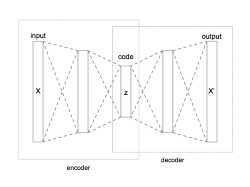
 
 * **Encoder** : maps the input into the code
 * **Decoder** : maps the code to a reconstruction of the input
 * **Applications** : 
1. Dimensionality reduction 
2. Principal component analysis
3. Information retrieval
4. Anomaly detection
5. etc

* Our Autoencoder is focusing on reconstruction of the MNIST dataset
* We are using Keras

<hr>

How to use this notebook :

There is only minimum explanation

This notebook could be helpful for who want to see how code works right away

Please upvote if it was helpful.!

<hr>

## Content
1. [Import libraries](#one)
2. [Prepare Data](#two)
3. [Modeling](#three)
4. [Training](#four)
5. [Evaluation](#five)

<hr>

<a id="one"></a>

# 1.Import Libraries

In [1]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

<hr>

<a id="two"></a>

# 2.Prepare Data

In [2]:
# read dataset 
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

# normalize and reshape the predictors  
train_x = train_x / 255

# split training data(80%) and validation data(20%) datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# reshape the inputs (1-dimention vector)
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [3]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<a id="three"></a>

# 3.Modeling

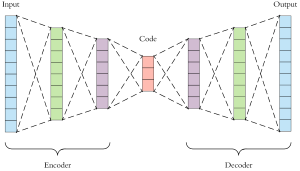

In [4]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

<a id="four"></a>

# 4. Training

In [6]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 15s 622ms/step - loss: 0.0971 - val_loss: 0.0685
Epoch 2/20
24/24 [==============================] - 14s 600ms/step - loss: 0.0645 - val_loss: 0.0579
Epoch 3/20
24/24 [==============================] - 15s 612ms/step - loss: 0.0515 - val_loss: 0.0444
Epoch 4/20
24/24 [==============================] - 14s 602ms/step - loss: 0.0415 - val_loss: 0.0387
Epoch 5/20
24/24 [==============================] - 15s 611ms/step - loss: 0.0372 - val_loss: 0.0357
Epoch 6/20
24/24 [==============================] - 14s 601ms/step - loss: 0.0339 - val_loss: 0.0329
Epoch 7/20
24/24 [==============================] - 15s 604ms/step - loss: 0.0306 - val_loss: 0.0302
Epoch 8/20
24/24 [==============================] - 15s 608ms/step - loss: 0.0282 - val_loss: 0.0271
Epoch 9/20
24/24 [==============================] - 14s 603ms/step - loss: 0.0260 - val_loss: 0.0261
Epoch 10/20
24/24 [==============================] - 15s 613ms/step - loss: 0.0250 - val_lo

In [7]:
preds = model.predict(val_x)

<a id="five"></a>

# 5. Evaluation

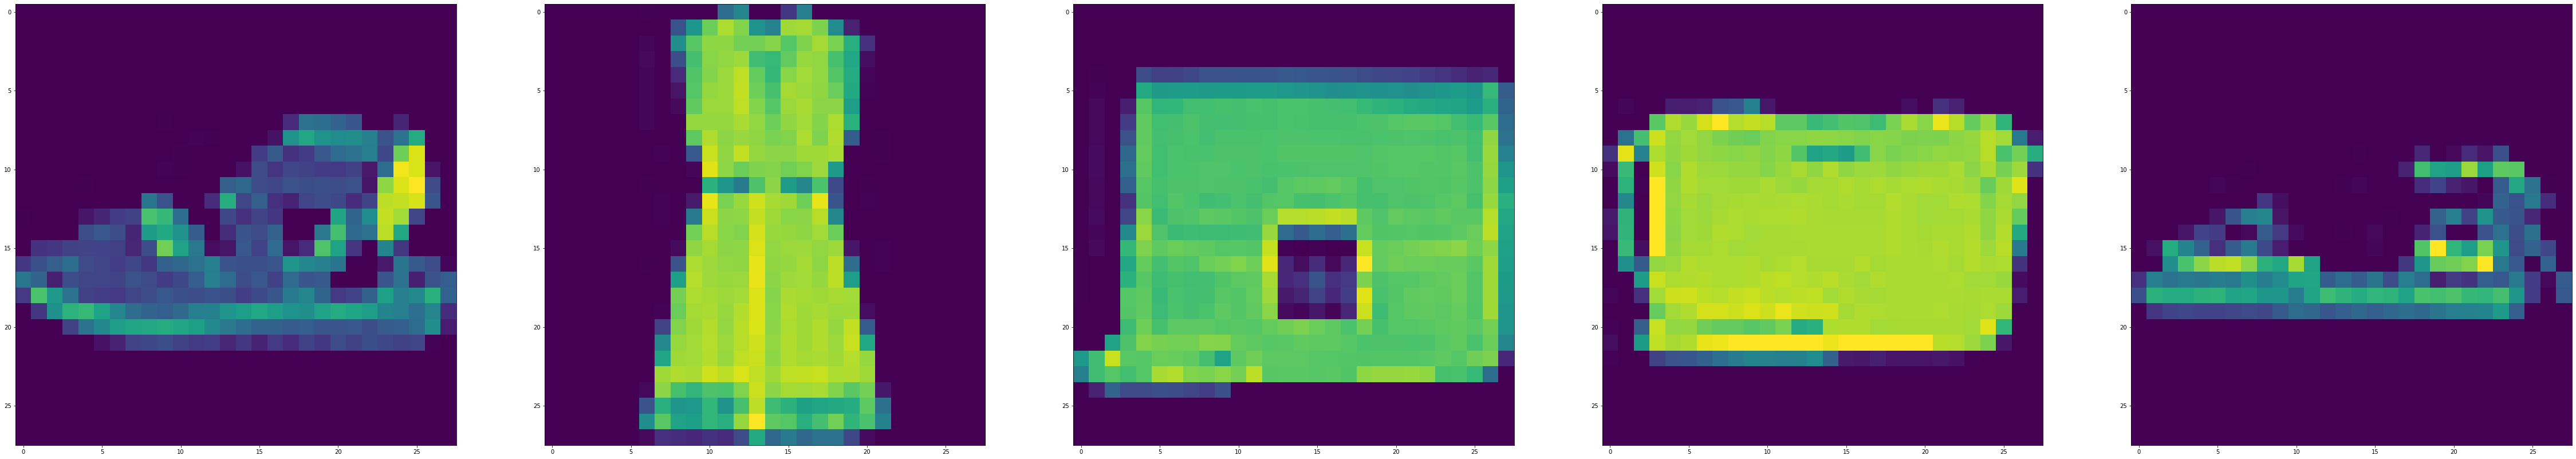

In [8]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

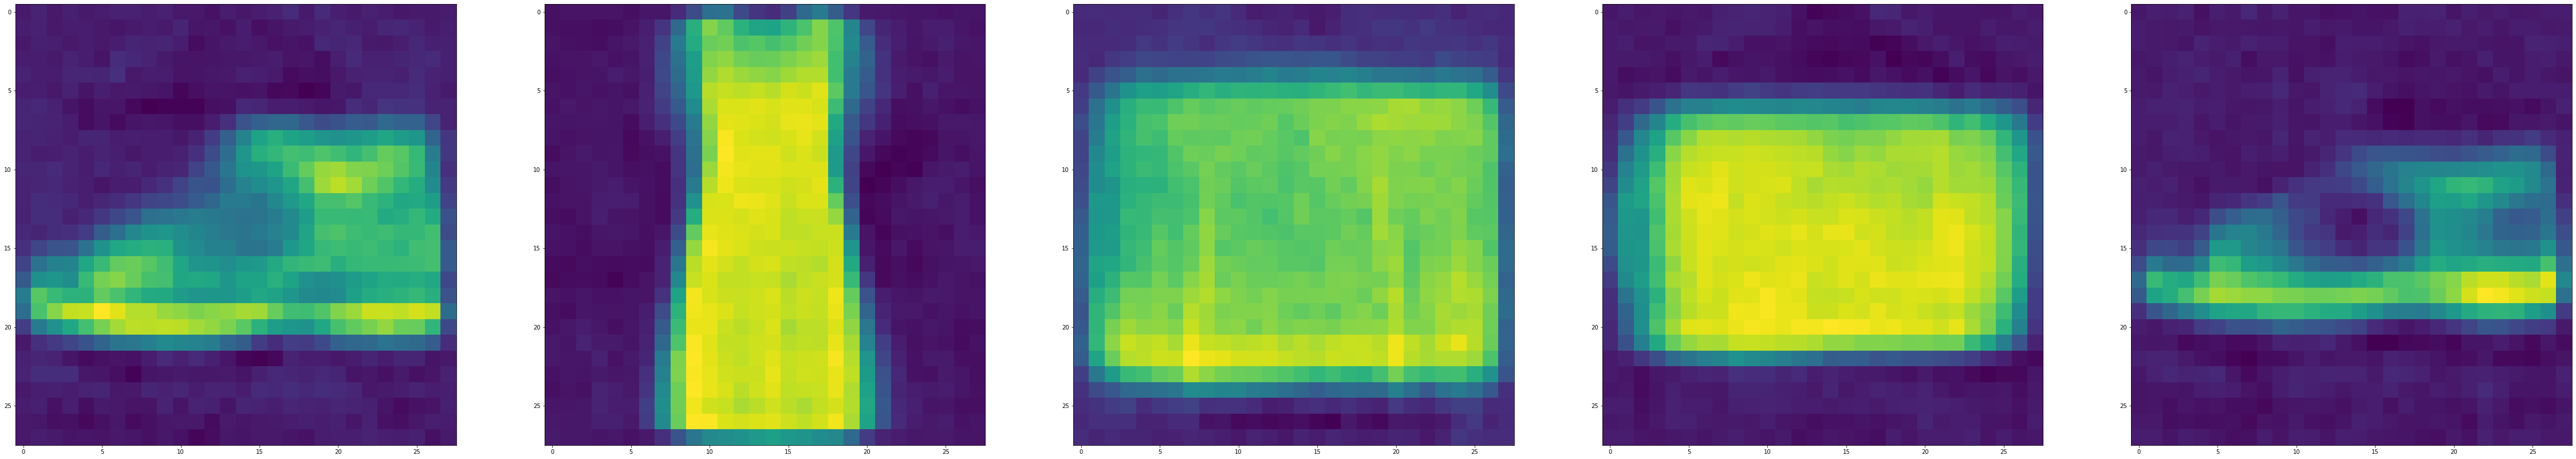

In [9]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

## Reference
[Wikipedia - autoencoder](https://en.wikipedia.org/wiki/Autoencoder)